In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("./summaryTable.csv")
dataset

,Unnamed: 0,FileName,VoiceVote,VoiceLevel,FaceVote,FaceLevel,MultiModalVote,MultiModalLevel
0,1,1001_IEO_NEU_XX,N,69.1,N,92.22,N,64.78
1,2,1001_IEO_HAP_LO,N,71.67,H,57,H,57.38
2,3,1001_IEO_HAP_MD,N,67.71,H,62.62,H,56.56
3,4,1001_IEO_HAP_HI,H,63.5,H,68.25,H,73.2
4,5,1001_IEO_SAD_LO,N,73.71,N,73.5,N,74.8
...,...,...,...,...,...,...,...,...
7437,7438,1091_WSI_HAP_XX,N,68.12,H,65.12,H,64.8
7438,7439,1091_WSI_SAD_XX,N,55.67,N,71.57,N,48.8
7439,7440,1091_WSI_ANG_XX,A,34.4,A,50.43,A,67.11
7440,7441,1091_WSI_FEA_XX,S,39.67,F,68.29,F,51.71


## Voice

In [107]:
vv = dataset["VoiceVote"]
vvc = dataset["VoiceVote"].value_counts()
#vvdf = pd.DataFrame(vvc)
vvdf = pd.DataFrame({'Frequency':vvc})
vvdf = vvdf[vvdf.index.isin(['N', 'A', 'F', 'D', 'S', 'H'])]
vvdf

,Frequency
N,3897
A,986
F,645
D,547
S,370
H,353


<AxesSubplot:title={'center':'Voice Emotion Frequency'}>

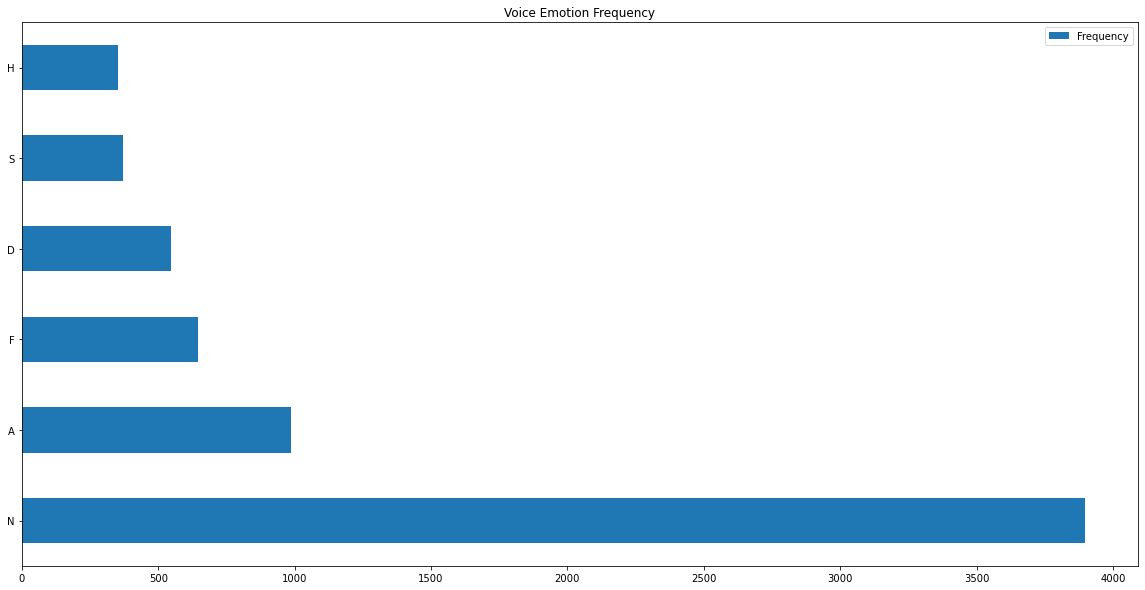

In [108]:
# Graph 
vvdf.plot(kind="barh", figsize=(20,10), title="Voice Emotion Frequency")

In [109]:
per = vv.value_counts(normalize=True) * 100

vvdf['Percent'] = per
vvdf

,Frequency,Percent
N,3897,52.364956
A,986,13.249127
F,645,8.667025
D,547,7.350175
S,370,4.971782
H,353,4.743349


## Face

In [110]:
fv = dataset["FaceVote"]
fvc = dataset["FaceVote"].value_counts()
fvdf = pd.DataFrame({'Frequency':fvc})
fvdf = fvdf[fvdf.index.isin(['N', 'A', 'F', 'D', 'S', 'H'])]
fvdf

,Frequency
N,2076
H,1266
D,1057
A,968
F,822
S,783


<AxesSubplot:title={'center':'Face Emotion Frequency'}>

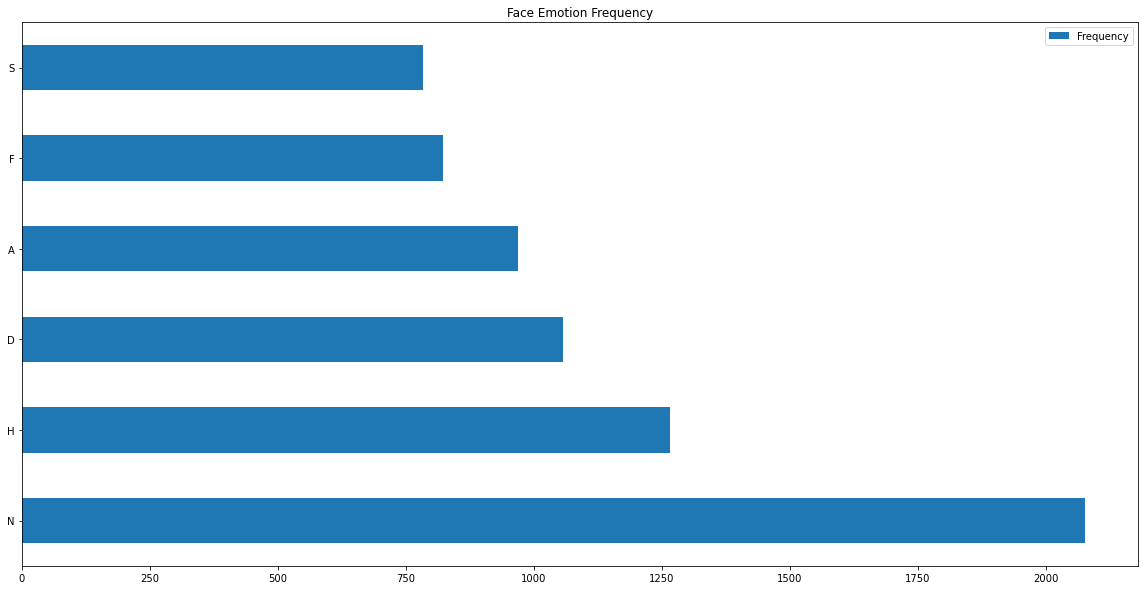

In [111]:
# Graph 
fvdf.plot(kind="barh", figsize=(20,10), title="Face Emotion Frequency")

In [112]:
per = fv.value_counts(normalize=True) * 100

fvdf['Percent'] = per
fvdf

,Frequency,Percent
N,2076,27.895727
H,1266,17.011556
D,1057,14.203171
A,968,13.007256
F,822,11.045418
S,783,10.521365


## MultiModal (Voice and Face)

In [162]:
mv = dataset["MultiModalVote"]
mvc = dataset["MultiModalVote"].value_counts()
mvdf = pd.DataFrame({'Frequency':mvc})
mvdf = mvdf = mvdf[mvdf.index.isin(['N', 'A', 'F', 'D', 'S', 'H'])]

<AxesSubplot:title={'center':'Multi-modal Emotion Frequency'}>

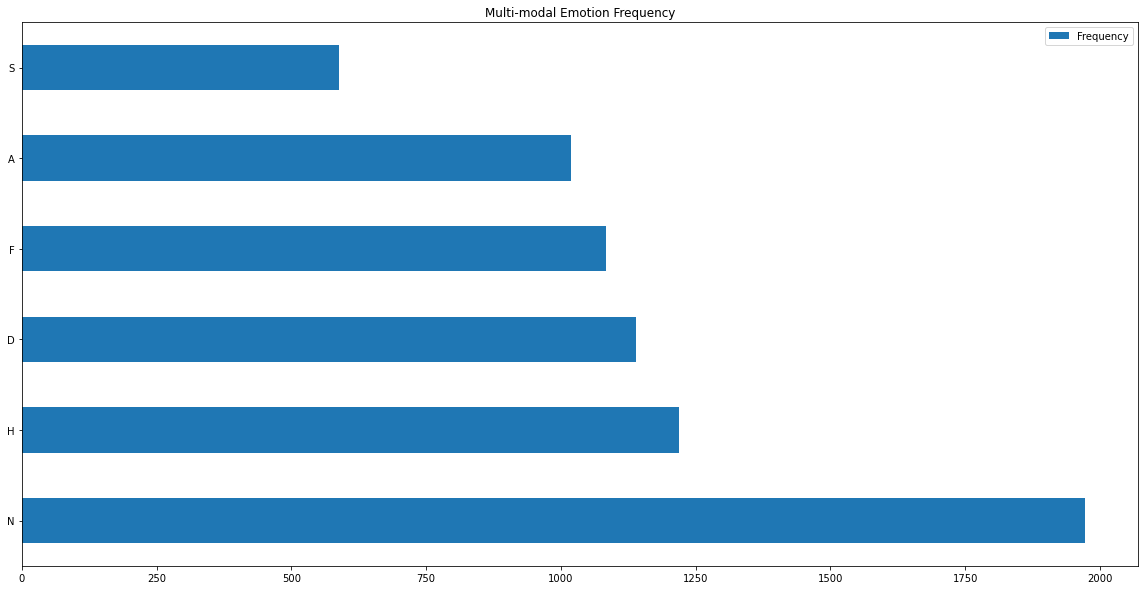

In [163]:
# Graph 
mvdf.plot(kind="barh", figsize=(20,10), title="Multi-modal Emotion Frequency")

In [164]:
per = mv.value_counts(normalize=True) * 100

mvdf['Percent'] = per
mvdf

,Frequency,Percent
N,1972,26.498253
H,1219,16.380005
D,1139,15.305026
F,1084,14.565977
A,1019,13.692556
S,589,7.914539


## Comparison

In [149]:
df = pd.DataFrame({'Voice':vvdf["Frequency"], 'Face':fvdf["Frequency"], 'Multimodal':mvdf["Frequency"]})
df

,Voice,Face,Multimodal
A,986,968,1019
D,547,1057,1139
F,645,822,1084
H,353,1266,1219
N,3897,2076,1972
S,370,783,589


In [150]:
#df.plot(kind='pie', stacked=True, title='Distribution of Emotions per Modality', figsize=(25,8), subplots=True)

In [151]:
df = df.T
df = df.fillna(0)
df

,A,D,F,H,N,S
Voice,986,547,645,353,3897,370
Face,968,1057,822,1266,2076,783
Multimodal,1019,1139,1084,1219,1972,589


In [152]:
df = pd.DataFrame({'Anger':df["A"], 'Disgust':df["D"], 'Fear':df["F"], 'Sad':df["S"], 'Happy':df["H"], 'Neutral':df["N"]})
df

,Anger,Disgust,Fear,Sad,Happy,Neutral
Voice,986,547,645,370,353,3897
Face,968,1057,822,783,1266,2076
Multimodal,1019,1139,1084,589,1219,1972


<AxesSubplot:title={'center':'Distribution of Emotions per Modality'}>

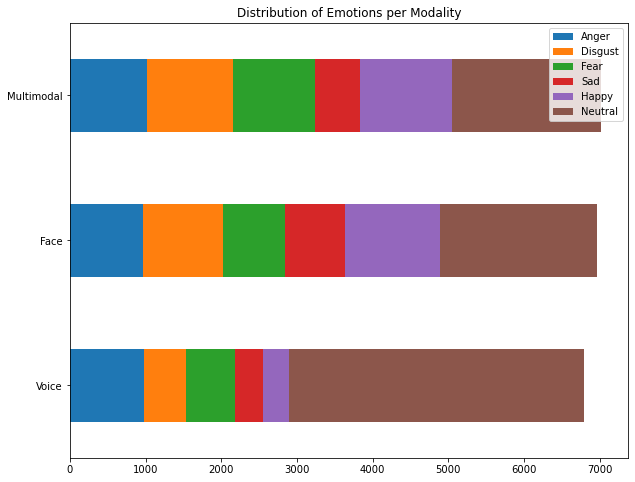

In [153]:
df.plot(kind='barh', stacked=True, title='Distribution of Emotions per Modality', figsize=(10,8))

array([<AxesSubplot:title={'center':'Anger'}>,
       <AxesSubplot:title={'center':'Disgust'}>,
       <AxesSubplot:title={'center':'Fear'}>,
       <AxesSubplot:title={'center':'Sad'}>,
       <AxesSubplot:title={'center':'Happy'}>,
       <AxesSubplot:title={'center':'Neutral'}>], dtype=object)

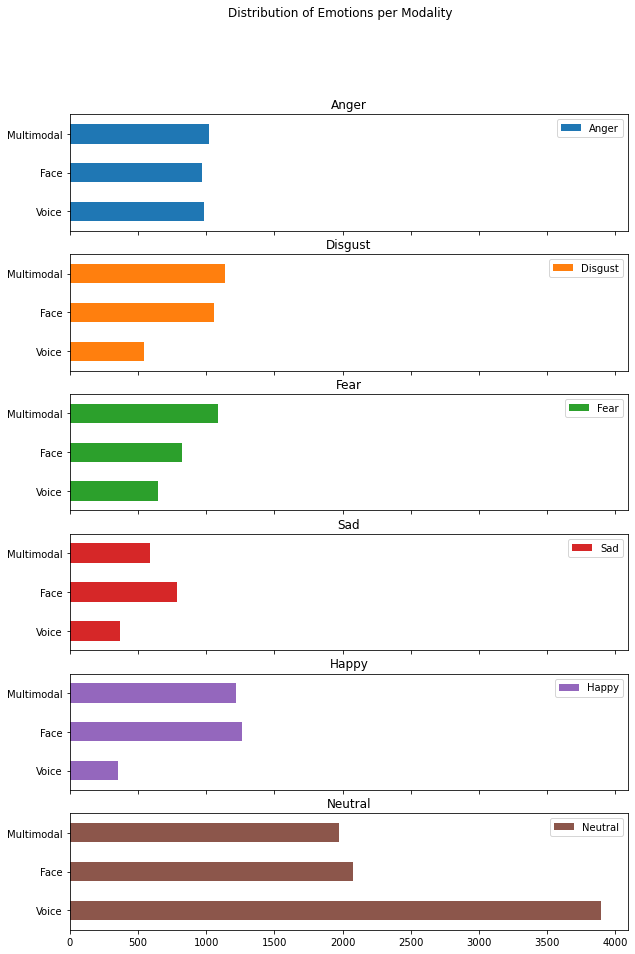

In [160]:
df.plot(kind='barh', stacked=True, title='Distribution of Emotions per Modality', figsize=(10,15), subplots=True)